In [1]:
import pyamg
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n=100
sten = pyamg.gallery.diffusion.diffusion_stencil_2d(epsilon=0.0001, theta=np.pi/4, type='FE')
A = pyamg.gallery.stencil_grid(sten, (n,n), format='csr')
x1d = np.linspace(0, 1, n)
X, Y = np.meshgrid(x1d, x1d)

In [6]:
ml = pyamg.ruge_stuben_solver(A, max_coarse=200, strength='evolution', keep=True)

In [7]:
ml

multilevel_solver
Number of Levels:     5
Operator Complexity:  1.871
Grid Complexity:      1.486
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0        10000        88804 [53.46%]
    1         3334        48164 [28.99%]
    2         1069        20649 [12.43%]
    3          342         6592 [ 3.97%]
    4          117         1919 [ 1.16%]

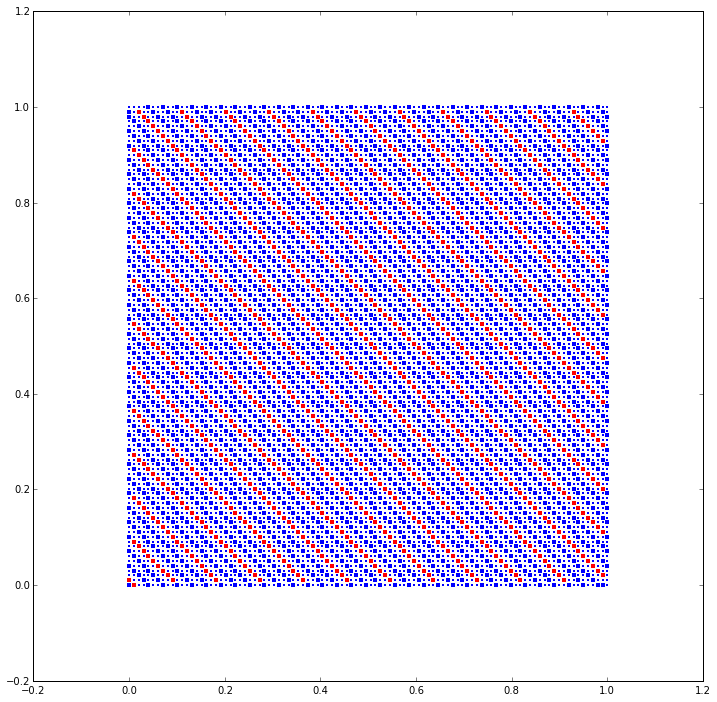

In [5]:
splitting0 = ml.levels[0].splitting
plt.figure(figsize=(12,12))

X = X.ravel()
Y = Y.ravel()

I = np.where(splitting0==0)[0]
plt.scatter(X[I], Y[I], color='b', s=8, marker='s', lw=0)

I = np.where(splitting0==1)[0]
plt.scatter(X[I], Y[I], color='b', s=16, marker='s', lw=0)

splitting1 = ml.levels[1].splitting
I1 = np.where(splitting1==1)[0]
plt.scatter(X[I[I1]], Y[I[I1]], color='r', s=22, marker='s', lw=0)

In [11]:
ml.cycle_complexity(cycle='AMLI')

7.390207648304131